In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [ ]:
def gradientBandit(NoOfTimeSteps,NoOfRuns,NoOfArms,alpha,WithBaseline):
  # ExpectedReward=[0]*(NoOfTimeSteps)
  # AverageAbsoluteError=[0]*(NoOfTimeSteps)
  OptimalArmChosen=[0]*(NoOfTimeSteps)
  for j in range(NoOfRuns):
    ActualQ=[]
    Preference=[0]*NoOfArms
    for i in range(NoOfArms):
      ActualQ.append(np.random.normal(4,1))
    OptimalArm=np.argmax(ActualQ)
    # EstimatedQ=[0]*NoOfArms
    # NoOfTimesChosen=[0]*NoOfArms
    baseline=0
    for i in range(NoOfTimeSteps):
      expSum=np.sum(np.exp(Preference))
      # ChosenArm=np.argmax(np.exp(Preference)/expSum)
      ChosenArm=np.random.choice(10,None,True,np.exp(Preference)/expSum)
      if ChosenArm==OptimalArm:
        OptimalArmChosen[i]+=1
      CurrentReward=np.random.normal(ActualQ[ChosenArm],1)
      if WithBaseline and i==0:
        baseline=CurrentReward
      z=0
      for arm in range(NoOfArms):
        if arm==ChosenArm:
          z=1
        else:
          z=0
        Preference[int(arm)]+=alpha*(CurrentReward-baseline)*(z-(math.exp(Preference[int(arm)])/expSum))
      if WithBaseline:
        baseline= baseline + (CurrentReward-baseline)/(i+1)
      # ExpectedReward[i]+=CurrentReward
  for i in range(NoOfTimeSteps):
    # ExpectedReward[i]/=NoOfRuns
    # AverageAbsoluteError[i]/=NoOfRuns
    OptimalArmChosen[i]*=(100/NoOfRuns)
  return OptimalArmChosen


In [ ]:
optArm1=gradientBandit(1000,2000,10,0.1,True)
optArm2=gradientBandit(1000,2000,10,0.4,True)
optArm3=gradientBandit(1000,2000,10,0.1,False)
optArm4=gradientBandit(1000,2000,10,0.4,False)

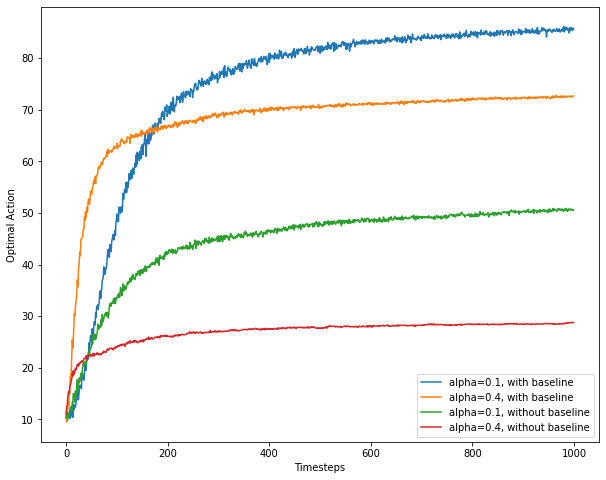

In [ ]:
plt.plot(optArm1)
plt.plot(optArm2)
plt.plot(optArm3)
plt.plot(optArm4)
plt.legend(["alpha=0.1, with baseline","alpha=0.4, with baseline","alpha=0.1, without baseline","alpha=0.4, without baseline"])
plt.xlabel("Timesteps")
plt.ylabel("Optimal Action")
# plt.figure(num=None,figsize=(10,8), dpi=None, facecolor=None, edgecolor=None, frameon=True)
plt.rcParams["figure.figsize"] = [10, 8]
# plt.show()